# Notebook 1: Why is Prediction difficult?

# Overview 

In this notebook, we will get our hands dirty trying to gain intuition about why prediction is better?
Our task is going to be a simple one, fitting data with polynomials of different order. Formally, this goes under the name of polynomial regression. Here we will do a series of exercises 

## Learning Goal

We will explore how our ability to predict depends on the number of data points we have, as well as the "noise" in the data. The goal is to build intuition about why prediction is difficult and discuss general strategies for overcoming these difficulties.


## Set up of Problem

Consider a probabilistic process that gives rise to labeled data $(y,x)$. The data is generated according to
$$
    y_i= f(x_i) + \eta_i,
$$
where $f(x_i)$ is some fixed, but unknown function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
We generate $n$ labeled datapoints or observation, $(x_i, y_i)$ for $i=1 \ldots n$, which we call the **training data set**. We want to make predictions for the $\{y_j^\mathrm{pred}\}$ corresponding to a different set of points $\{ x_j\}$, which we call the **test data set** and see how well we do. Importantly, we want to measure how well our algorithm does by comparing our predictions,$\{y_j^\mathrm{pred}\}$, to the real values $\{y_j\}$ generated using $f(x_i)$.

To make prediction, we will consider a family of functions $\{g_\alpha(x; \mathbf{\theta}_\alpha)\}$ that depend on some parameters $\theta$. These represent our possible **models** for the data. In our example, the model class will be polynomials of order 1 (linear), 3, and 10. One reasonable thing to do is to choose the parameters $\mathbf{\theta}_\alpha$ for each of the $g_\alpha(x; \mathbf{\theta}_\alpha)$ to minimize the error on the *training set*. 


We will consider two general cases:

1. In the first case, the underlying data is generated from a process that lies in the model class. In other words, $f(x_i)$ itself is a polynomial of order 1,3, or 10. 

2. In the second case, $f(x_i)$ is not generated by a polynomial. Instead, it is generated by an exponential function and hence our data lies outside our model class.


We start by considering the case where $$f(x)=2x$$. Then the data is clearly generated within the model class we are fitting with. We draw $n=20$ datapoints which we call $(x_i, y_i)$ with $x_i=1\ldots n-1$,and $y_i=2x_i+\eta_i$.

We fit these points with a linear model,
$$
y=a_1 x+ a_0,
$$
a third-order polynomial,
$$
y=a_3 x^3 +a_2 x^2 +a_1 x+ a_0,
$$
and a 10-th order polynomial
$$
y=\sum_{j=0}^{10} a_j x^j.
$$

The data and fits are generated in the cell below. We then use these fitted parameters to make predictions on the test set in the cell below the excercise.

The code below generates sample data, fits the training data to each of these three polynomials, and makes a plot of the predictions on the test data set. The figures are shown for $n=20$ and $\sigma=0$ (no noise).

<IPython.core.display.Javascript object>


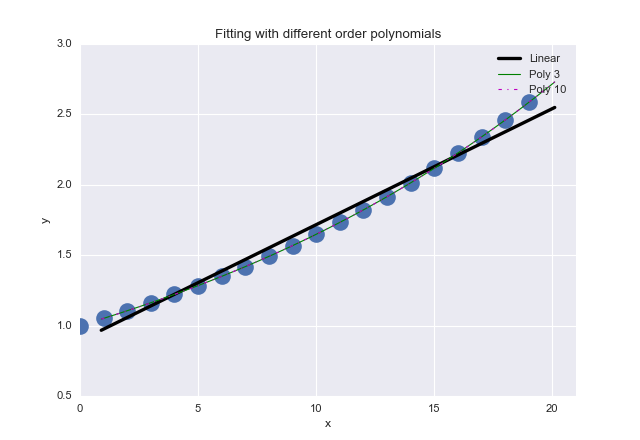

In [24]:
#This is Python Notebook to walk through linear regression examples
#We will use this to think about regression



import numpy as np
import sklearn as sk
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

%matplotlib notebook
import matplotlib.pyplot as plt


# The Training Data

n=20

sigma_train=0.0;

# Train on integers
x=np.arange(0,n)

# Draw random noise
s = sigma_train*np.random.randn(n)


y=np.exp(x/20.)+s
plt.plot(x,y.transpose(), "o", ms=15)


#Linear Regression


# Create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training sets


clf.fit(x[:, np.newaxis], y)
# The coefficients

xplot=np.arange(0.9,n+0.1,0.1)
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), color='black',linewidth=3, label='Linear')

#Polynomial Regression

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), color='green',linewidth=1, label='Poly 3')



#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), 'm-.',linewidth=1, label='Poly 10')

axes = plt.gca()
axes.set_xlim([0,n+1])

handles, labels=axes.get_legend_handles_labels()
plt.legend(handles,labels)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting with different order polynomials')
plt.show()








#  Excercise:

1. Right now, the graphs in data are generated without noise (i.e. $\sigma=0). We will add noise to the data.

    * Play with the noise strength in both the training and test data by changing the variables *sigma_train* and *sigma_test* (making them the same, different, vary them between 0-5). How well do the different models fit the training data?

The low order polynomial models fit have a worst training error than the 10th order polynomial. The error on the test set is however smaller for the low order polynomials. This is clear when you try to make prediction outside the interval where the data was generated.
    
    
    Which model fits the training data the best? Why is this the case?

The problem is that we are overfitting, i.e. adding to much complexity to our model.

* Do you think that the data that has the least error on the training set will also make the best predictions?
Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?

The mean of your estimator is the same at the mean of the model from which the data was generated. 

   *Check your answers using the code below? Write down 3-4 sentence summarizing the general ideas we learned here.

+ Right now the range of $x$ on which we are **training** and on which we making predictions are identical. We are training on $x_i=0 ... n-1$ and making predictions on random number in the same range. Let us change this.

    * Change the range on which we make predictions by changing the variable *max_test* and making it smaller and larger than $n$. How does your ability to predict change?
    
    * Now combine this with changing $n$ and $\sigma_{train}$? How do the combined variable have effect prediction?
    
+ Now we will change the function we are generating the data from. Generate data from the two functions below are repeat the excercises in 1 and 2.

$$f(x)=\exp[x/20]$$

$$f(x)=\exp[-(x/20)-3]$$

    * How does your ability to predict with $n$ change in the two cases?
    
    * What is the effect of $\sigma$?
    
    * Is there some fundamental difference when the data is not generated from the model class?
    
+  Summarize what you have learned and brainstorm general strategies that could improve are ability to make predictions? How are your ability to correctly fit the training data related to your ability to predict?
    
      



# Predicting on a test set

We can now look at how these models do on unobserved data. This is often called the *test set* whereas the data used to fit the models is called the *training set*. Below we generate 10 new test data points as before and show how well these fits predict these new data.

<IPython.core.display.Javascript object>


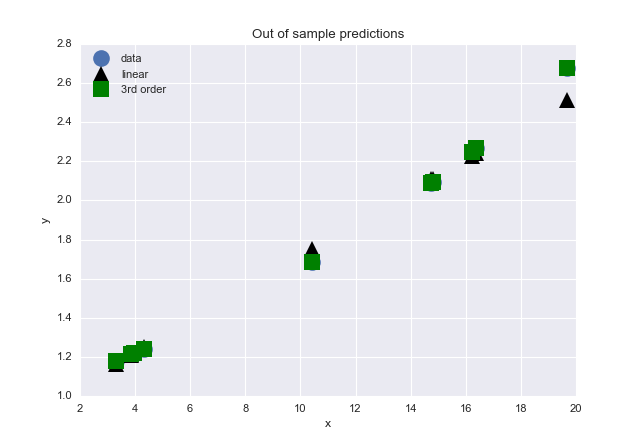

<IPython.core.display.Javascript object>


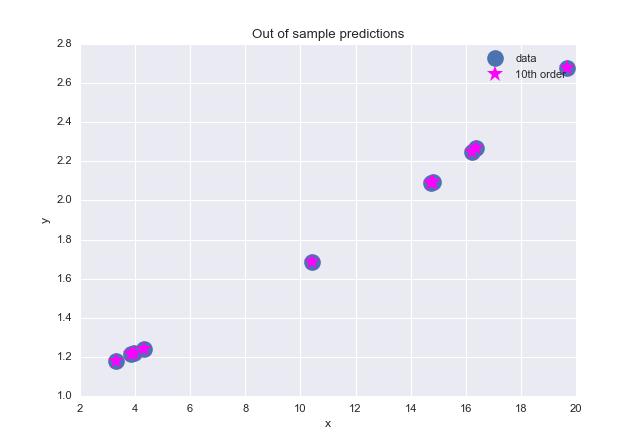

In [26]:
# Generate Training Data

#Number of test data
ntest=10

sigma_test=sigma_train

# Train on integers

max_test=n

xtest=max_test*np.random.rand(ntest)
# Draw random noise
stest = sigma_test*np.random.randn(ntest)

ytest=np.exp(xtest/20.)+stest
#Make design matrices for prediction
X3 = poly3.fit_transform(xtest[:,np.newaxis])
X10 = poly10.fit_transform(xtest[:,np.newaxis])


%matplotlib notebook

fig = plt.figure() 
p1=plt.plot(xtest,ytest.transpose(), "o", ms=15, label='data')
p2=plt.plot(xtest,clf.predict(xtest[:, np.newaxis]), "^", color='black', ms=15, label='linear')
p3=plt.plot(xtest,clf3.predict(X3), "s", color='green', ms=15, label='3rd order')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Out of sample predictions')
plt.show()

fig=plt.figure()
plt.plot(xtest,ytest.transpose(), "o", ms=15, label='data')
ax=plt.plot(xtest,clf10.predict(X10), "*", color='magenta', ms=15, label='10th order')
plt.legend(loc=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Out of sample predictions')

plt.show()
